In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [9]:
all_jako_11 = pd.read_csv('jakobshavn11.csv')
all_jako_12 = pd.read_csv('jakobshavn12.csv')
all_jako_13 = pd.read_csv('jakobshavn13.csv')
all_jako_14 = pd.read_csv('jakobshavn14.csv')
all_jako_15 = pd.read_csv('jakobshavn15.csv')
all_jako_16 = pd.read_csv('jakobshavn16.csv')
all_south_11 = pd.read_csv('southeast11.csv')
all_south_12 = pd.read_csv('southeast12.csv')
all_south_13 = pd.read_csv('southeast13.csv')
all_south_14 = pd.read_csv('southeast14.csv')
all_south_15 = pd.read_csv('southeast15.csv')
all_south_16 = pd.read_csv('southeast16.csv')
all_stor_11 = pd.read_csv('storstrommen11.csv')
all_stor_12 = pd.read_csv('storstrommen12.csv')
all_stor_13 = pd.read_csv('storstrommen13.csv')
all_stor_14 = pd.read_csv('storstrommen14.csv')
all_stor_15 = pd.read_csv('storstrommen15.csv')
all_stor_16 = pd.read_csv('storstrommen16.csv')

all_jako = pd.concat([all_jako_11, all_jako_12, all_jako_13, 
                      all_jako_14, all_jako_15, all_jako_16])
all_south = pd.concat([all_south_11, all_south_12, all_south_13, 
                       all_south_14, all_south_15, all_south_16])
all_stor = pd.concat([all_stor_11, all_stor_12, all_stor_13, 
                      all_stor_14, all_stor_15, all_stor_16])

all_df = pd.concat([all_jako, all_south, all_stor])

In [10]:
all_df_cle = all_df[(all_df['DemDiff_Swath']>-50)&
                      (all_df['DemDiff_Swath']<25)&
                      (all_df['DemDiff_SwathOverPoca']<100000)&
                      (all_df['MeanDiffSpread_Swath']<200)]

In [11]:
feature = all_df_cle[['Coh_Swath', 
                     'Coh_SwathOverPoca', 
                     'LeadEdgeW_Poca', 
                     'PhaseConfidence_Swath', 
                     'Phase_Swath', 
                     'Phase_SwathOverPoca', 
                     'PowerScaled_Swath', 
                     'PowerScaled_SwathOverPoca', 
                     'SampleNb_Swath', 
                     'SampleNb_SwathMinusLeadEdgeS', 
                      'DayInYear_Swath', 
                      'Dist_SwathToPoca', 
                      'Heading_Swath', 
                      'LeadEdgeS_Poca', 
                      'PhaseSSegment_Swath', 
                      'PowerWatt_Swath']]

target = all_df_cle['Elev_Oib'] - all_df_cle['Elev_Swath']

In [12]:
stand_trans = MinMaxScaler().fit_transform(np.array(feature))
target_trans = np.array(target)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(stand_trans, target_trans, test_size = 0.3)

In [14]:
model_ols = LinearRegression()
model_ols_fit = model_ols.fit(X_train, y_train)
ypred_ols = model_ols_fit.predict(X_test)
mse_ols = mean_squared_error(ypred_ols, y_test)

In [15]:
print(mse_ols)

34.14217549463266


In [16]:
model_tree = ExtraTreesRegressor(n_estimators = 100, min_samples_split = 2)
model_tree_fit_all = model_tree.fit(X_train, y_train)
feature_selec_tree = SelectFromModel(model_tree_fit_all, prefit = True)

In [17]:
feature_tree = feature_selec_tree.get_support(indices = True)
print(feature.columns[feature_tree])

Index(['Phase_Swath', 'SampleNb_Swath', 'SampleNb_SwathMinusLeadEdgeS',
       'Dist_SwathToPoca', 'Heading_Swath'],
      dtype='object')


In [18]:
X_train_tree = feature_selec_tree.transform(X_train)
X_test_tree = feature_selec_tree.transform(X_test)

In [19]:
model_tree_fit = model_tree.fit(X_train_tree, y_train)
ypred_tree = model_tree_fit.predict(X_test_tree)
mse_tree = mean_squared_error(ypred_tree, y_test)

In [20]:
print(mse_tree)

0.8194634558916468


In [21]:
two_area = pd.concat([all_jako, all_south])
one_area = pd.concat([all_stor])
two_area_cle = two_area[(two_area['DemDiff_Swath']>-50)&
                      (two_area['DemDiff_Swath']<25)&
                      (two_area['DemDiff_SwathOverPoca']<100000)&
                      (two_area['MeanDiffSpread_Swath']<200)]
one_area_cle = one_area[(one_area['DemDiff_Swath']>-50)&
                      (one_area['DemDiff_Swath']<25)&
                      (one_area['DemDiff_SwathOverPoca']<100000)&
                      (one_area['MeanDiffSpread_Swath']<200)]
two_feature = two_area_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
one_feature = one_area_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
two_target = two_area_cle['Elev_Oib'] - two_area_cle['Elev_Swath']
one_target = one_area_cle['Elev_Oib'] - one_area_cle['Elev_Swath']

In [22]:
X_train = MinMaxScaler().fit_transform(np.array(two_feature))
y_train = np.array(two_target)
X_test = MinMaxScaler().fit_transform(np.array(one_feature))
y_test = np.array(one_target)

In [23]:
model_ols = LinearRegression()
model_ols_fit = model_ols.fit(X_train, y_train)
ypred_ols = model_ols_fit.predict(X_test)
mse_ols = mean_squared_error(ypred_ols, y_test)

In [24]:
print(mse_ols)

1.2950801884339697e+24


In [35]:
model_tree = ExtraTreesRegressor(n_estimators = 100, min_samples_split = 2)
model_tree_fit_all = model_tree.fit(X_train, y_train)
feature_selec_tree = SelectFromModel(model_tree_fit_all, prefit = True)

In [36]:
feature_tree = feature_selec_tree.get_support(indices = True)
print(two_feature.columns[feature_tree])

Index(['Dist_SwathToPoca', 'Heading_Swath', 'Phase_Swath', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS'],
      dtype='object')


In [37]:
X_train_tree = feature_selec_tree.transform(X_train)
X_test_tree = feature_selec_tree.transform(X_test)

In [38]:
model_tree_fit = model_tree.fit(X_train_tree, y_train)
ypred_tree = model_tree_fit.predict(X_test_tree)
mse_tree = mean_squared_error(ypred_tree, y_test)

In [39]:
print(mse_tree)

33.15527781593493


In [40]:
jako_time = pd.concat([all_jako_11, all_jako_12, all_jako_13, 
                      all_jako_14, all_jako_15])
south_time = pd.concat([all_south_11, all_south_12, all_south_13, 
                       all_south_14, all_south_15])
stor_time = pd.concat([all_stor_11, all_stor_12, all_stor_13, 
                      all_stor_14, all_stor_15])
all_time = pd.concat([jako_time, south_time, stor_time])
all_16 = pd.concat([all_jako_16, all_south_16, all_stor_16])
all_time_cle = all_time[(all_time['DemDiff_Swath']>-50)&
                      (all_time['DemDiff_Swath']<25)&
                      (all_time['DemDiff_SwathOverPoca']<100000)&
                      (all_time['MeanDiffSpread_Swath']<200)]
all_16_cle = all_16[(all_16['DemDiff_Swath']>-50)&
                      (all_16['DemDiff_Swath']<25)&
                      (all_16['DemDiff_SwathOverPoca']<100000)&
                      (all_16['MeanDiffSpread_Swath']<200)]
alltime_feature = all_time_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
all16_feature = all_16_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
alltime_target = all_time_cle['Elev_Oib'] - all_time_cle['Elev_Swath']
all16_target = all_16_cle['Elev_Oib'] - all_16_cle['Elev_Swath']

In [41]:
X_train_time = MinMaxScaler().fit_transform(np.array(alltime_feature))
y_train_time = np.array(alltime_target)
X_test_time = MinMaxScaler().fit_transform(np.array(all16_feature))
y_test_time = np.array(all16_target)

In [42]:
model_ols = LinearRegression()
model_ols_fit = model_ols.fit(X_train_time, y_train_time)
ypred_ols = model_ols_fit.predict(X_test_time)
mse_ols = mean_squared_error(ypred_ols, y_test_time)

In [43]:
print(mse_ols)

7.995574475237903e+21


In [44]:
model_tree = ExtraTreesRegressor(n_estimators = 100, min_samples_split = 2)
model_tree_fit_alltime = model_tree.fit(X_train_time, y_train_time)
feature_selec_tree_time = SelectFromModel(model_tree_fit_alltime, prefit = True)

In [45]:
feature_tree_time = feature_selec_tree_time.get_support(indices = True)
print(alltime_feature.columns[feature_tree_time])

Index(['Dist_SwathToPoca', 'Heading_Swath', 'Phase_Swath', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS'],
      dtype='object')


In [46]:
X_train_tree_time = feature_selec_tree_time.transform(X_train_time)
X_test_tree_time = feature_selec_tree_time.transform(X_test_time)

In [47]:
model_tree_fit = model_tree.fit(X_train_tree_time, y_train_time)
ypred_tree_time = model_tree_fit.predict(X_test_tree_time)
mse_tree_time = mean_squared_error(ypred_tree_time, y_test_time)

In [48]:
print(mse_tree_time)

37.883903460976306


In [52]:
ref_feature = all_df[['DemDiff_Swath', 
                       'DemDiffMad_Swath', 
                      'DemDiff_SwathOverPoca', 
                      'MeanDiffSpread_Swath']]

In [53]:
demdiff = np.array(ref_feature['DemDiff_Swath'])
demdiff_mad = np.array(ref_feature['DemDiffMad_Swath'])
demdiff_sop = np.array(ref_feature['DemDiff_SwathOverPoca'])
diffspread_mean = np.array(ref_feature['MeanDiffSpread_Swath'])

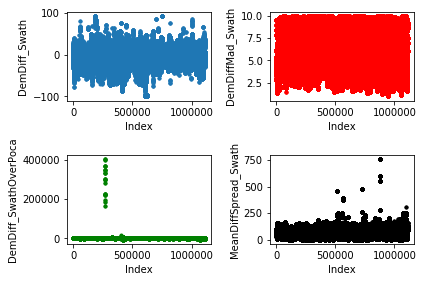

In [54]:
plt.subplot(2, 2, 1)
plt.plot(demdiff, '.')
plt.ylabel('DemDiff_Swath') 
plt.xlabel('Index')
plt.subplot(2, 2, 2)
plt.plot(demdiff_mad, '.', color = 'r')
plt.ylabel('DemDiffMad_Swath')
plt.xlabel('Index')
plt.subplot(2, 2, 3)
plt.plot(demdiff_sop, '.', color = 'g')
plt.ylabel('DemDiff_SwathOverPoca')
plt.xlabel('Index')
plt.subplot(2, 2, 4)
plt.plot(diffspread_mean, '.', color = 'k')
plt.ylabel('MeanDiffSpread_Swath')
plt.xlabel('Index')
plt.tight_layout()
plt.savefig('Figure_1_all')
plt.show()

In [57]:
all_df_cle = all_df[(all_df['DemDiff_Swath']>-50)&
                      (all_df['DemDiff_Swath']<25)&
                      (all_df['DemDiff_SwathOverPoca']<100000)&
                      (all_df['MeanDiffSpread_Swath']<200)]

In [58]:
print(all_df_cle.shape)

(1080800, 29)


In [59]:
demdiff_new = np.array(all_df_cle['DemDiff_Swath'])
demdiff_mad_new = np.array(all_df_cle['DemDiffMad_Swath'])
demdiff_sop_new = np.array(all_df_cle['DemDiff_SwathOverPoca'])
diffspread_mean_new = np.array(all_df_cle['MeanDiffSpread_Swath'])

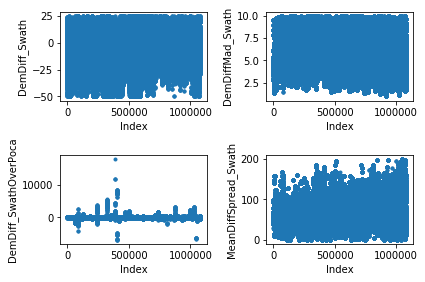

In [60]:
plt.subplot(2, 2, 1)
plt.plot(demdiff_new, '.')
plt.ylabel('DemDiff_Swath') 
plt.xlabel('Index')
plt.subplot(2, 2, 2)
plt.plot(demdiff_mad_new, '.')
plt.ylabel('DemDiffMad_Swath')
plt.xlabel('Index')
plt.subplot(2, 2, 3)
plt.plot(demdiff_sop_new, '.')
plt.ylabel('DemDiff_SwathOverPoca')
plt.xlabel('Index')
plt.subplot(2, 2, 4)
plt.plot(diffspread_mean_new, '.')
plt.ylabel('MeanDiffSpread_Swath')
plt.xlabel('Index')
plt.tight_layout()
plt.show()

In [61]:
feature = all_df_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]

target = all_df_cle['Elev_Oib'] - all_df_cle['Elev_Swath']
target_div = all_df_cle['Elev_Oib'] / all_df_cle['Elev_Swath']

In [62]:
div_ele = np.array(target_div)
diff_ele = np.array(target)
coh = np.array(feature['Coh_Swath'])
coh_sop = np.array(feature['Coh_SwathOverPoca'])
day = np.array(feature['DayInYear_Swath'])
dist_sop = np.array(feature['Dist_SwathToPoca'])
head = np.array(feature['Heading_Swath'])
leads = np.array(feature['LeadEdgeS_Poca'])
leadw = np.array(feature['LeadEdgeW_Poca'])
phasecon = np.array(feature['PhaseConfidence_Swath'])
phasess = np.array(feature['PhaseSSegment_Swath'])
phase = np.array(feature['Phase_Swath'])
phase_sop = np.array(feature['Phase_SwathOverPoca'])
power = np.array(feature['PowerScaled_Swath'])
power_sop = np.array(feature['PowerScaled_SwathOverPoca'])
powerw = np.array(feature['PowerWatt_Swath'])
samplenb = np.array(feature['SampleNb_Swath'])
samplenb_sml = np.array(feature['SampleNb_SwathMinusLeadEdgeS'])

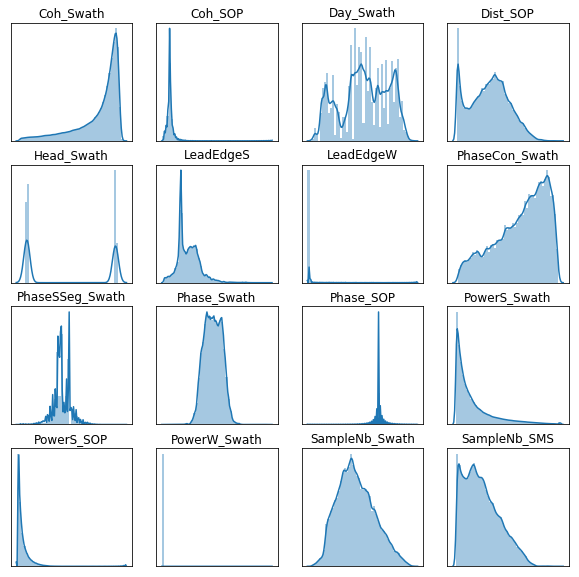

In [63]:
plt.figure(figsize = (10, 10))
plt.subplot(4, 4, 1)
sns.distplot(coh)
plt.xticks([])
plt.yticks([])
plt.title('Coh_Swath')
plt.subplot(4, 4, 2)
sns.distplot(coh_sop)
plt.xticks([])
plt.yticks([])
plt.title('Coh_SOP')
plt.subplot(4, 4, 3)
sns.distplot(day)
plt.xticks([])
plt.yticks([])
plt.title('Day_Swath')
plt.subplot(4, 4 ,4)
sns.distplot(dist_sop)
plt.xticks([])
plt.yticks([])
plt.title('Dist_SOP')
plt.subplot(4, 4, 5)
sns.distplot(head)
plt.xticks([])
plt.yticks([])
plt.title('Head_Swath')
plt.subplot(4, 4, 6)
sns.distplot(leads)
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeS')
plt.subplot(4, 4, 7)
sns.distplot(leadw)
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeW')
plt.subplot(4, 4, 8)
sns.distplot(phasecon)
plt.xticks([])
plt.yticks([])
plt.title('PhaseCon_Swath')
plt.subplot(4, 4, 9)
sns.distplot(phasess)
plt.xticks([])
plt.yticks([])
plt.title('PhaseSSeg_Swath')
plt.subplot(4, 4, 10)
sns.distplot(phase)
plt.xticks([])
plt.yticks([])
plt.title('Phase_Swath')
plt.subplot(4, 4, 11)
sns.distplot(phase_sop)
plt.xticks([])
plt.yticks([])
plt.title('Phase_SOP')
plt.subplot(4, 4, 12)
sns.distplot(power)
plt.xticks([])
plt.yticks([])
plt.title('PowerS_Swath')
plt.subplot(4, 4, 13)
sns.distplot(power_sop)
plt.xticks([])
plt.yticks([])
plt.title('PowerS_SOP')
plt.subplot(4, 4, 14)
sns.distplot(powerw)
plt.xticks([])
plt.yticks([])
plt.title('PowerW_Swath')
plt.subplot(4, 4, 15)
sns.distplot(samplenb)
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_Swath')
plt.subplot(4, 4, 16)
sns.distplot(samplenb_sml)
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_SMS')
plt.savefig('Figure_2_all')
plt.show()

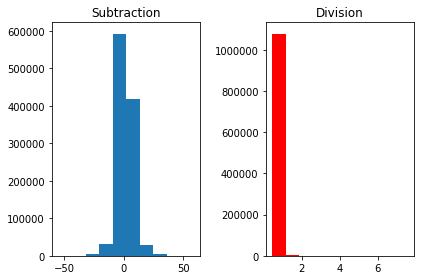

In [64]:
plt.subplot(1, 2, 1)
plt.hist(diff_ele)
plt.title('Subtraction')
plt.subplot(1, 2, 2)
plt.hist(div_ele, color = 'r')
plt.title('Division')
plt.tight_layout()
plt.savefig('Figure_3_all')
plt.show()

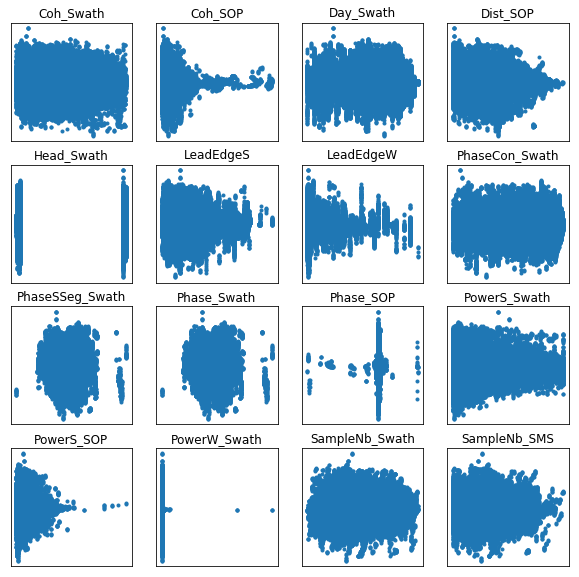

In [65]:
plt.figure(figsize = (10, 10))
plt.subplot(4, 4, 1)
plt.plot(coh, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_Swath')
plt.subplot(4, 4, 2)
plt.plot(coh_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_SOP')
plt.subplot(4, 4, 3)
plt.plot(day, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Day_Swath')
plt.subplot(4, 4 ,4)
plt.plot(dist_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Dist_SOP')
plt.subplot(4, 4, 5)
plt.plot(head, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Head_Swath')
plt.subplot(4, 4, 6)
plt.plot(leads, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeS')
plt.subplot(4, 4, 7)
plt.plot(leadw, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeW')
plt.subplot(4, 4, 8)
plt.plot(phasecon, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseCon_Swath')
plt.subplot(4, 4, 9)
plt.plot(phase, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseSSeg_Swath')
plt.subplot(4, 4, 10)
plt.plot(phase, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_Swath')
plt.subplot(4, 4, 11)
plt.plot(phase_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_SOP')
plt.subplot(4, 4, 12)
plt.plot(power, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_Swath')
plt.subplot(4, 4, 13)
plt.plot(power_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_SOP')
plt.subplot(4, 4, 14)
plt.plot(powerw, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerW_Swath')
plt.subplot(4, 4, 15)
plt.plot(samplenb, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_Swath')
plt.subplot(4, 4, 16)
plt.plot(samplenb_sml, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_SMS')
plt.savefig('Figure_4_all')
plt.show()

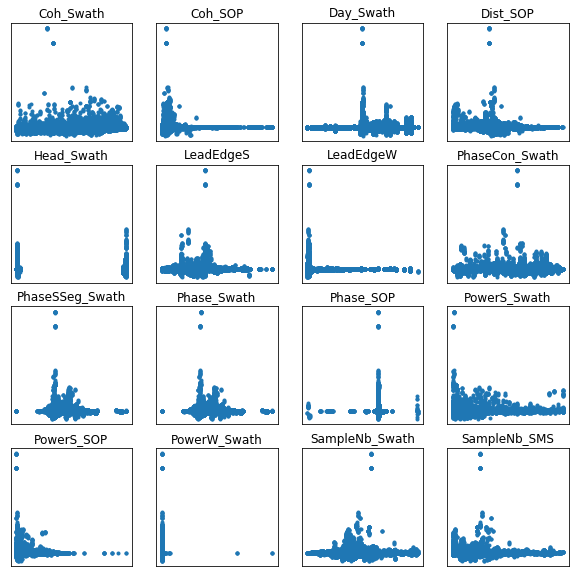

In [66]:
plt.figure(figsize = (10, 10))
plt.subplot(4, 4, 1)
plt.plot(coh, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_Swath')
plt.subplot(4, 4, 2)
plt.plot(coh_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_SOP')
plt.subplot(4, 4, 3)
plt.plot(day, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Day_Swath')
plt.subplot(4, 4 ,4)
plt.plot(dist_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Dist_SOP')
plt.subplot(4, 4, 5)
plt.plot(head, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Head_Swath')
plt.subplot(4, 4, 6)
plt.plot(leads, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeS')
plt.subplot(4, 4, 7)
plt.plot(leadw, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeW')
plt.subplot(4, 4, 8)
plt.plot(phasecon, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseCon_Swath')
plt.subplot(4, 4, 9)
plt.plot(phase, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseSSeg_Swath')
plt.subplot(4, 4, 10)
plt.plot(phase, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_Swath')
plt.subplot(4, 4, 11)
plt.plot(phase_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_SOP')
plt.subplot(4, 4, 12)
plt.plot(power, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_Swath')
plt.subplot(4, 4, 13)
plt.plot(power_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_SOP')
plt.subplot(4, 4, 14)
plt.plot(powerw, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerW_Swath')
plt.subplot(4, 4, 15)
plt.plot(samplenb, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_Swath')
plt.subplot(4, 4, 16)
plt.plot(samplenb_sml, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_SMS')
plt.savefig('Figure_5_all')
plt.show()